In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import glob

from IPython.display import Audio
import soundfile as sf
import librosa
import scipy

# Importar as bases de dados

In [2]:
noisefiles = glob.glob('../../bases_vozes/urbansound_8k/*.wav')
files = glob.glob('../../bases_vozes/Base_Vozes_IFPB/banco de vozes_mono/vozes_nome/Vozes Mono/**/*.wav')

print(f'Quantidade de ruido {len(noisefiles)}')
print(f'Quantidade de sons {len(files)}')

Quantidade de ruido 8732
Quantidade de sons 91


In [3]:
pwd

'/home/pedrodsk/ifpb/pds/projeto'

## Exemplo de fala

In [4]:
rand_int = np.random.randint(0, len(files)-1)
y, fs = librosa.load(files[rand_int])
samples = len(y)
length = samples/fs
print(rand_int)
print(f'Quantidade de amostras: {samples} amostras')
print(f'Taxa de amostragem: {fs}Hz')
print(f'Número de canais: {len(y.shape)}')
print(f'Tamanho do sinal: {length}s')

31
Quantidade de amostras: 27585 amostras
Taxa de amostragem: 22050Hz
Número de canais: 1
Tamanho do sinal: 1.2510204081632652s


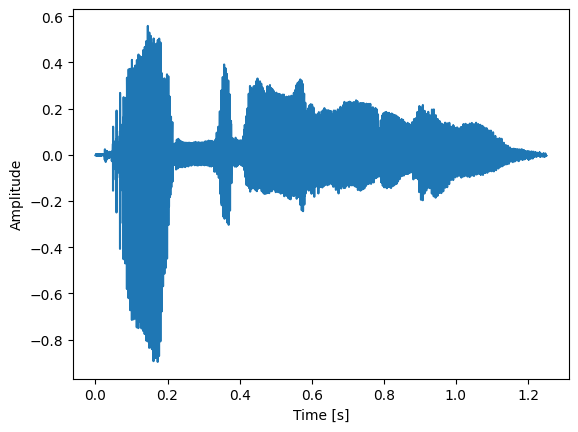

In [5]:
time = np.linspace(0., length, y.shape[0])
plt.plot(time, y)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [6]:
Audio(y, rate=fs)

## Exemplo de ruído

In [6]:
rand_int = np.random.randint(0, len(noisefiles)-1)
y_noise, fs = librosa.load(noisefiles[87])
samples = len(y_noise)
length = samples/fs

print(rand_int)
print(f'Quantidade de amostras: {samples} amostras')
print(f'Taxa de amostragem: {fs}Hz')
print(f'Número de canais: {len(y_noise.shape)}')
length = samples/fs
print(f'Tamanho do sinal: {length}s')

6015
Quantidade de amostras: 78278 amostras
Taxa de amostragem: 22050Hz
Número de canais: 1
Tamanho do sinal: 3.5500226757369613s


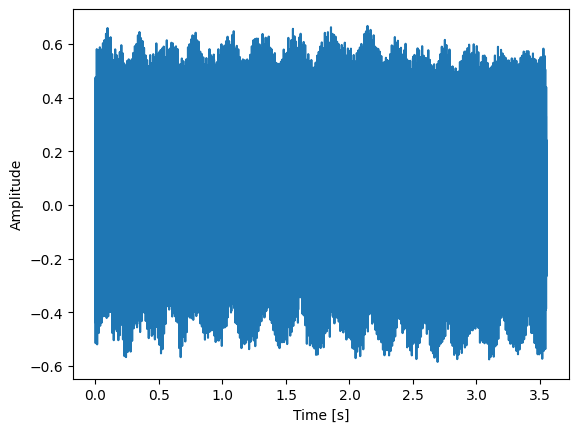

In [7]:
time = np.linspace(0., length, y_noise.shape[0])
plt.plot(time, y_noise)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [8]:
Audio(y_noise, rate=fs)

## fft

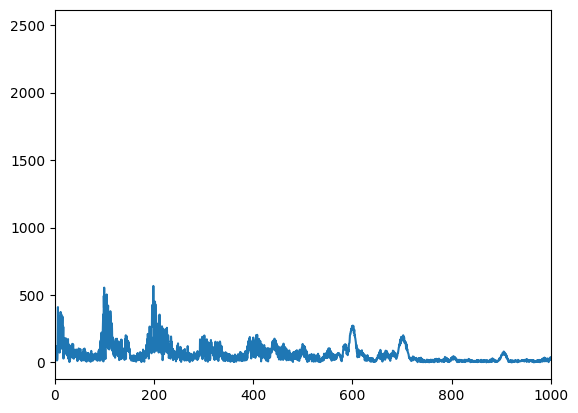

Frequencia fundamental : 8000.090252707581 Hz


In [9]:
yk = abs(np.fft.rfft(y_noise))
freqs = np.arange(len(yk))
freqs = freqs * fs / samples

plt.plot(freqs, yk)
plt.xlim([0, 1000])
plt.plot(np.where(yk == max(yk))[0][0]*fs/samples, np.max(yk), "x")
plt.show()
print(f'Frequencia fundamental : {np.where(yk == max(yk))[0][0]*fs/samples} Hz')

## Som fornecido

In [10]:
rand_int = np.random.randint(0, len(noisefiles)-1)
y_noise, fs = librosa.load('../matlab/projeto01/sound005.wav')
samples = len(y_noise)
length = samples/fs

print(f'Quantidade de amostras: {samples} amostras')
print(f'Taxa de amostragem: {fs}Hz')
print(f'Número de canais: {len(y_noise.shape)}')
length = samples/fs
print(f'Tamanho do sinal: {length}s')

4790
Quantidade de amostras: 53184 amostras
Taxa de amostragem: 22050Hz
Número de canais: 1
Tamanho do sinal: 2.411972789115646s


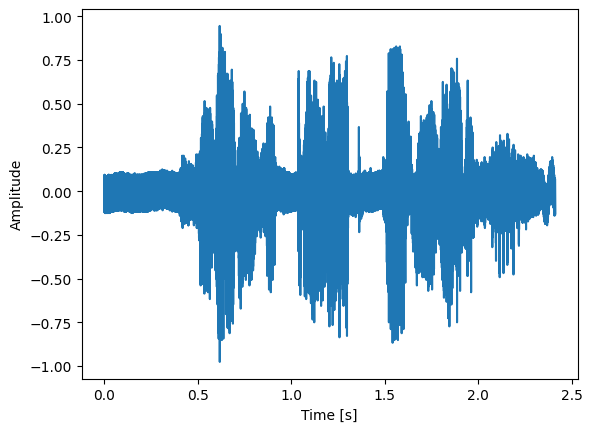

In [11]:
time = np.linspace(0., length, y_noise.shape[0])
plt.plot(time, y_noise)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [12]:
Audio(y_noise, rate=fs)

## fft

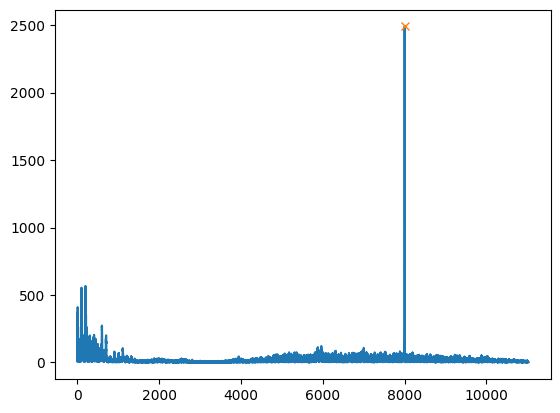

Frequencia fundamental : 8000.090252707581 Hz


In [13]:
yk = abs(np.fft.rfft(y_noise))
freqs = np.arange(len(yk))
freqs = freqs * fs / samples

plt.plot(freqs, yk)
#plt.xlim([6000, 9000])
plt.plot(np.where(yk == max(yk))[0][0]*fs/samples, np.max(yk), "x")
plt.show()
print(f'Frequencia fundamental : {np.where(yk == max(yk))[0][0]*fs/samples} Hz')

In [14]:
## Projeto do FIR

In [15]:
w, h = scipy.signal.freqz(coeficientes, 1)

In [16]:
fs

22050

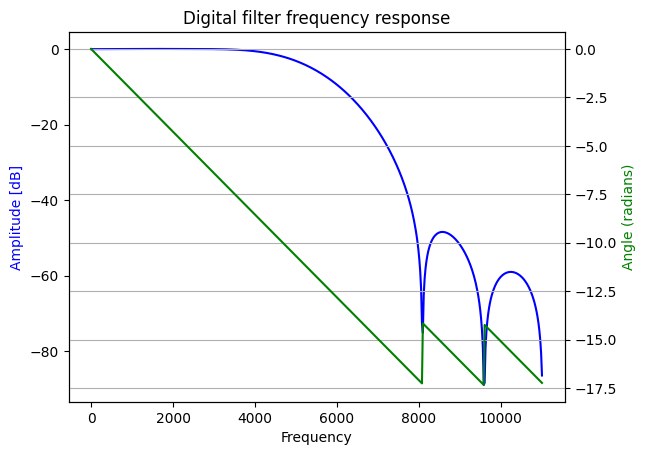

In [17]:
b = scipy.signal.firwin(16, 5550, window='hamming', fs=fs)
w, h = scipy.signal.freqz(b, fs=fs)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')

ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

In [18]:
Audio(y_noise, rate=fs)

In [19]:
y = scipy.signal.filtfilt(b, 1, y_noise)
Audio(y, rate=fs)

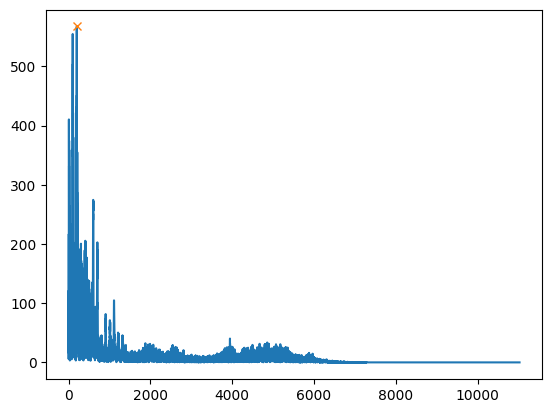

In [20]:
yk = abs(np.fft.rfft(y))
freqs = np.arange(len(yk))
freqs = freqs * fs / samples

plt.plot(freqs, yk)
#plt.xlim([3000, 8000])
plt.plot(np.where(yk == max(yk))[0][0]*fs/samples, np.max(yk), "x")
#plt.axvline(x = 45.6, color = 'r')
#plt.axvline(x = 49.6, color = 'r')
plt.show()

# Filtro IIR

In [21]:
# filter with passband within 3 dB from 20 to 50 rad/s, while rejecting at least -40 dB below 14 and above 60 rad/s.

In [22]:
fpp = 4000
fss = 8000
fcc = 5500

In [23]:
wp = fpp / (fs / 2)
ws = fss / (fs / 2)
wc = fcc / (fs / 2)

b, a = scipy.signal.butter(5, wc, 'low')

In [24]:
print(wp, ws, wc)

0.36281179138321995 0.7256235827664399 0.4988662131519274


In [25]:
y = scipy.signal.filtfilt(b, a, y_noise)
Audio(y, rate=fs)

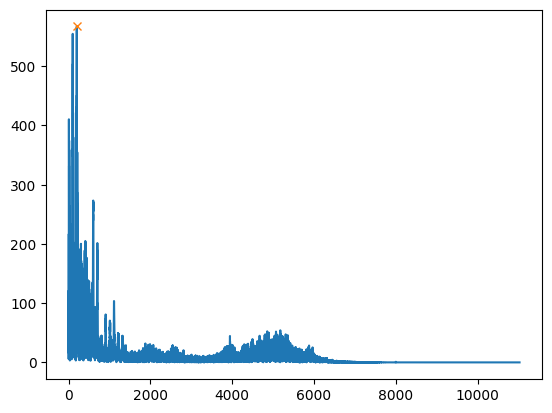

In [26]:
yk = abs(np.fft.rfft(y))
freqs = np.arange(len(yk))
freqs = freqs * fs / samples

plt.plot(freqs, yk)
#plt.xlim([3000, 8000])
plt.plot(np.where(yk == max(yk))[0][0]*fs/samples, np.max(yk), "x")
#plt.axvline(x = 45.6, color = 'r')
#plt.axvline(x = 49.6, color = 'r')
plt.show()